# Support Vector Machine ( SVM )

### A method for both regression and classification, SVM can be use face scanning and face ID.


# whether data is linear or non linear, both can be used
## Linear data=== Data which on a graph can be linearly seperated i.e. different data can be demarcated with a simple line on graph.
## Non Linear Data=== Data which can't be linearly seperated i.e. has no distinguishable clear boundaries on graph.

<img src="images/svm.webp">

# two methods for Hyper planes when more than two classes:
1. One vs One Class
2. One vs Rest Class.

In one vs one , the hyper plane is drawn dividing two classes at a time.
In one vs rest, the hyper plane is drawn dividing one from rest.

<img src="images/svm1.png">

# Overfitting is due to training on data many times with limited learning to machine.

# There is a Regularization term in svclassification which is used to increase the accuracy of classification

<img src="images/svm2.png"> 

# Herre one class is treated as positive class and one is treated as negative class. While Classifying, we can find the distance of a point from line so as to better classify that point.

## This decision_function ( to calculate the distance of the point ) is used to check how many were outliers to the classes earlier defined and predicted. This shows that sample distance If small is outlier and can be unknown or different sample.

# Code :

In [2]:
import numpy as np
from sklearn.svm import SVC

In [3]:
x=np.array([[2,1],[6,2],[2.5,1.5],[5,3],[3,0],[5,4],[1,1],[4.5,2]])
y=np.array([0,1,0,1,0,1,0,1])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

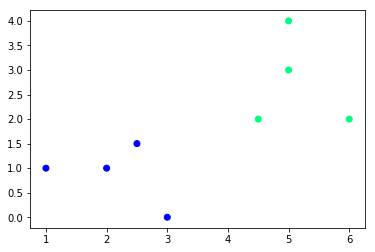

In [5]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')

In [6]:
clf=SVC(kernel='linear',probability=True)
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict([[4,2]])

array([1])

In [8]:
clf.predict_proba([[4,2]])

array([[ 0.41686997,  0.58313003]])

In [9]:
clf.support_vectors_

array([[ 2.5,  1.5],
       [ 3. ,  0. ],
       [ 4.5,  2. ]])

In [10]:
clf.decision_function([[ 2.5,  1.5],
       [ 3. ,  0. ],
       [ 4.5,  2. ]])

array([-0.99960774, -1.00019613,  0.99980387])

In [11]:
clf.coef_      # these are the coefficients of the line of hyper plane

array([[ 0.92271483,  0.30796387]])

In [12]:
clf.intercept_    # this is the intercept

array([-3.76834063])

In [13]:
from sklearn.datasets import load_digits
digits=load_digits()

In [14]:
X=digits.data
Y=digits.target

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [17]:
X_train.shape

(1347L, 64L)

In [18]:
X_test.shape

(450L, 64L)

In [19]:
Y_train.shape

(1347L,)

In [20]:
Y_test.shape

(450L,)

In [21]:
clf=SVC(kernel='linear')

In [22]:
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.score(X_test,Y_test)

1.0

In [24]:
clf.score(X_train,Y_train)

1.0

In [25]:
a=0
for i in [0.1,1,10,100]:
    a=a+1
    clf2=SVC(kernel='linear',C=i)
    clf2.fit(X,Y)
    print "Case:",a
    print "Test",clf2.score(X_test,Y_test)
    print "Train",clf2.score(X_train,Y_train),"\n"

Case: 1
Test 1.0
Train 1.0 

Case: 2
Test 1.0
Train 1.0 

Case: 3
Test 1.0
Train 1.0 

Case: 4
Test 1.0
Train 1.0 



In [26]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,shuffle=True)

In [27]:
scores = cross_val_score(clf, X, Y,cv=kf,scoring='accuracy')
print np.mean(scores)

0.980527622595


# This is how SVM is done.